In [35]:
from PublicDataReader import Kbland

# API 초기화
api = Kbland()

# 파라미터 설정
params = {
    "월간주간구분코드": "01",   # 월간 데이터
    "매물종별구분": "01",       # 아파트 매물
    "매매전세코드": "01",        # 매매
    "지역코드": "41280",            # 지역코드 (예: 서울)
    "기간": "3",                 # 최근 2년
}

df = api.get_price_index(**params)
# df['지역코드'] = df['지역코드'].astype(int)
df_goyang = df[df['지역명'].isin(['고양시 덕양구', '고양시 일산동구', '고양시 일산서구'])]
df_goyang = df_goyang[df_goyang['날짜'] >= '2022-01-01']

 
df_goyang

,월간주간구분,매물종별구분,거래구분,지역코드,지역명,날짜,가격지수
930,월간,아파트,매매,4128100000,고양시 덕양구,2022-01-01,100.000000
931,월간,아파트,매매,4128100000,고양시 덕양구,2022-02-01,100.010281
932,월간,아파트,매매,4128100000,고양시 덕양구,2022-03-01,99.939335
933,월간,아파트,매매,4128100000,고양시 덕양구,2022-04-01,99.721556
934,월간,아파트,매매,4128100000,고양시 덕양구,2022-05-01,99.813042
...,...,...,...,...,...,...,...
1031,월간,아파트,매매,4128700000,고양시 일산서구,2024-04-01,84.239276
1032,월간,아파트,매매,4128700000,고양시 일산서구,2024-05-01,84.098635
1033,월간,아파트,매매,4128700000,고양시 일산서구,2024-06-01,84.034945
1034,월간,아파트,매매,4128700000,고양시 일산서구,2024-07-01,83.773676


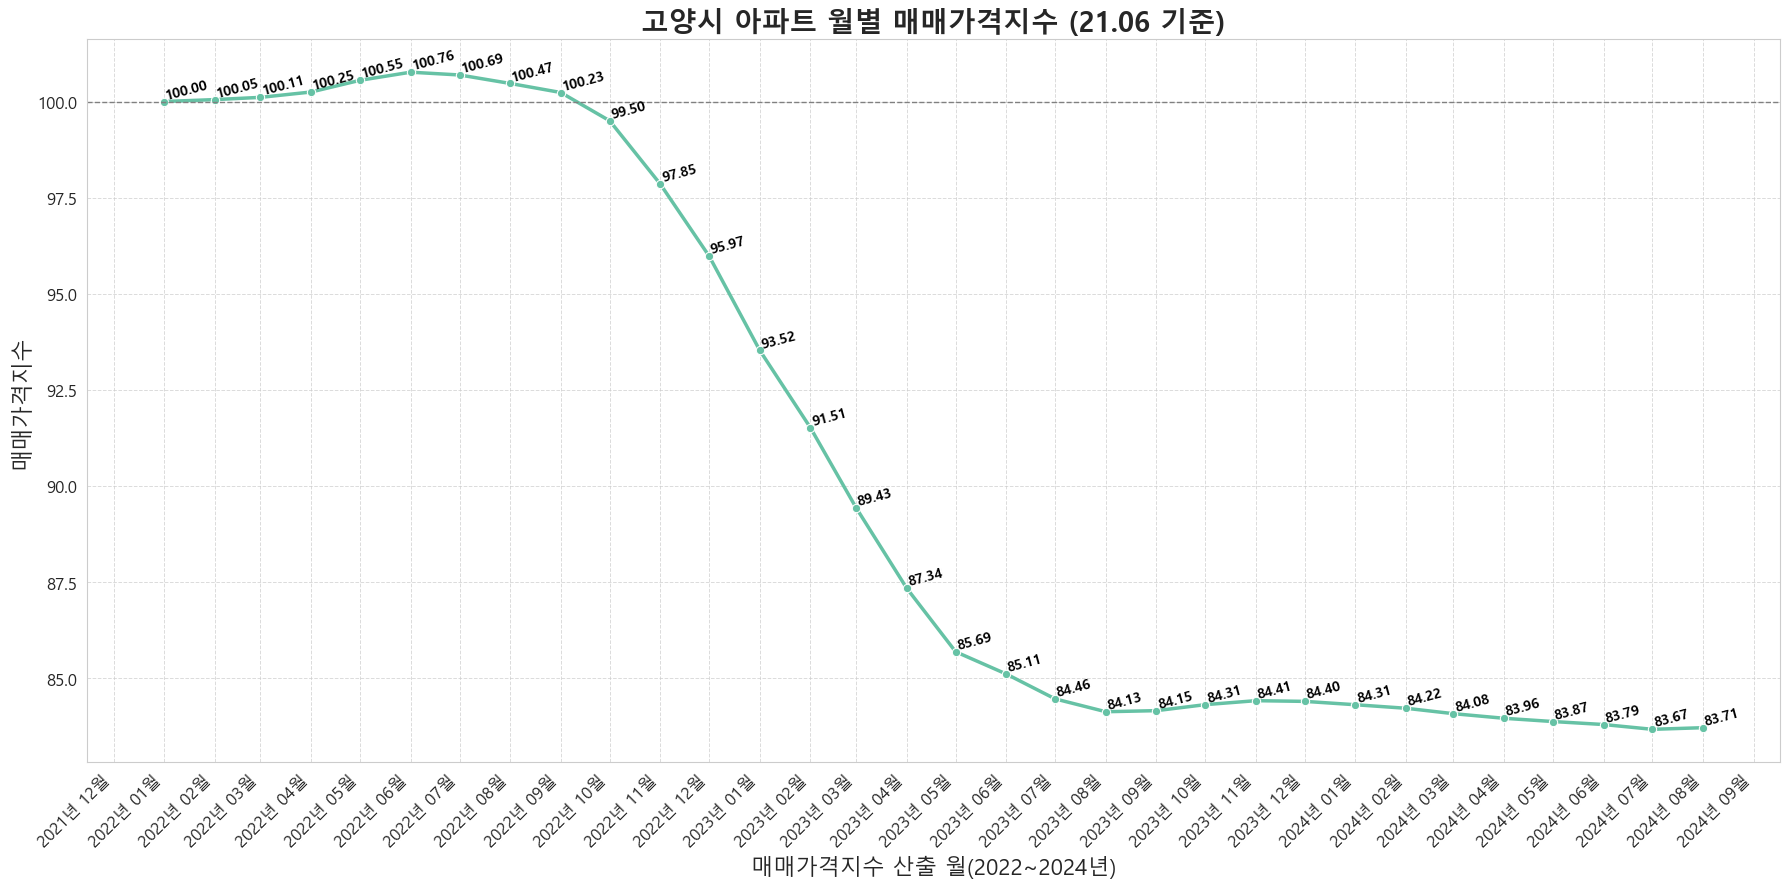

In [36]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 폰트 경로 삽입
font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 데이터 전처리
goyang_monthly_indi_kb = df_goyang.copy()
goyang_monthly_indi_kb['날짜'] = pd.to_datetime(goyang_monthly_indi_kb['날짜'], format='%Y%m')

monthly_avg_indi_kb = goyang_monthly_indi_kb.groupby('날짜')['가격지수'].mean().reset_index()

# 그래프 설정
plt.figure(figsize=(18, 9))

# 스타일 및 색상 설정
sns.set_palette("Set2")  # 부드러운 색상 팔레트 사용
sns.lineplot(data=monthly_avg_indi_kb, x='날짜', y='가격지수', marker='o', linewidth=2.5)

# 제목과 축 레이블 설정
plt.title('고양시 아파트 월별 매매가격지수 (22.01 기준)', fontsize=20, weight='bold')
plt.xlabel('매매가격지수 산출 월(2022~2024년)', fontsize=16)
plt.ylabel('매매가격지수', fontsize=16)

# 날짜 포맷 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y년 %m월'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# X축과 Y축 눈금 글자 크기 설정
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# 눈금선 추가 및 스타일 설정
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Y축 0에 가로선 추가
plt.axhline(y=100, color='gray', linestyle='--', linewidth=1)

# 레이아웃 조정
plt.tight_layout()

# 각 데이터 포인트 위에 평균 거래금액 표시
for i in range(len(monthly_avg_indi_kb)):
    plt.text(monthly_avg_indi_kb['날짜'].iloc[i], 
             monthly_avg_indi_kb['가격지수'].iloc[i], 
             f'{monthly_avg_indi_kb["가격지수"].iloc[i]:,.2f}', 
             ha='left', va='bottom', fontsize=10, color='black', fontweight='bold', rotation=15)

# 그래프 표시
plt.show()

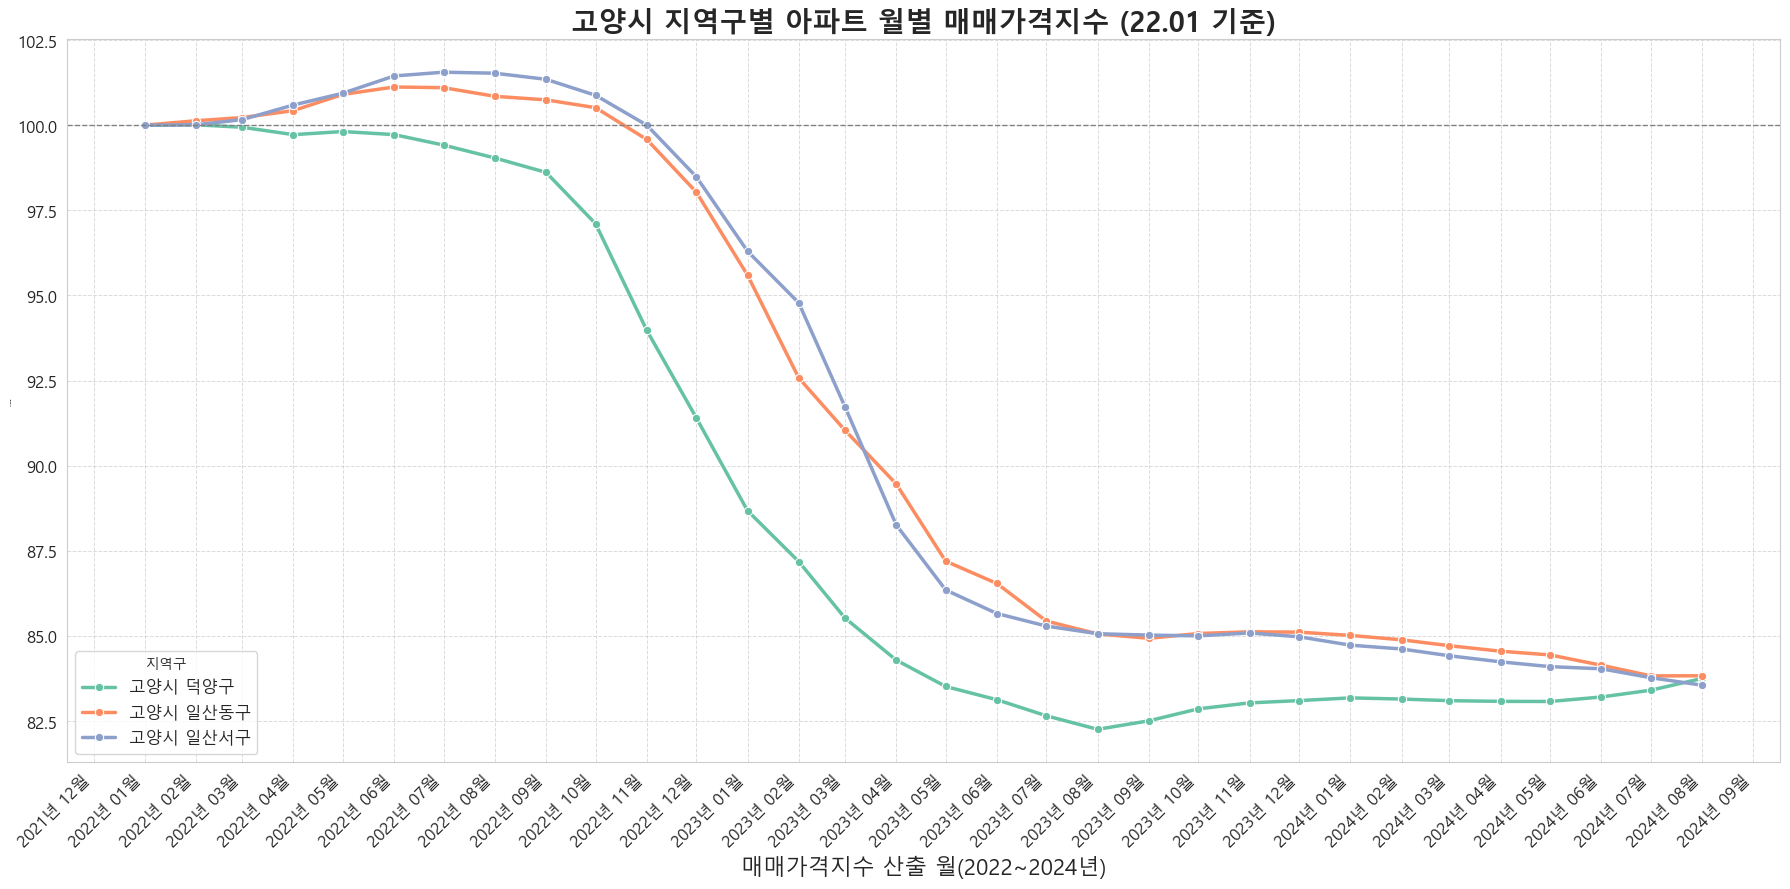

In [37]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 폰트 경로 삽입
font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리
items_monthly_indi_gu_kb = df_goyang.copy()
items_monthly_indi_gu_kb['날짜'] = pd.to_datetime(items_monthly_indi_gu_kb['날짜'], format='%Y%m')

# 그래프 설정
plt.figure(figsize=(18, 9))

# 스타일 및 색상 설정
#sns.set_palette("Set2")  # 부드러운 색상 팔레트 사용
sns.lineplot(data=items_monthly_indi_gu_kb, x='날짜', y='가격지수', hue='지역명', marker='o', linewidth=2.5, palette='Set2')

# 제목과 축 레이블 설정
plt.title('고양시 지역구별 아파트 월별 매매가격지수 (22.01 기준)', fontsize=20, weight='bold')
plt.xlabel('매매가격지수 산출 월(2022~2024년)', fontsize=16)
plt.ylabel('매매가격지수', fontsize=1)
 
# 날짜 포맷 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y년 %m월'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# X축과 Y축 눈금 글자 크기 설정
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# 눈금선 추가 및 스타일 설정
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Y축 0에 가로선 추가
plt.axhline(y=100, color='gray', linestyle='--', linewidth=1)

plt.legend(title='지역구', fontsize=12)

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()
